In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [281]:
train_df = pd.read_csv('C:/Users/angel/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/angel/Downloads/test.csv')
combine = [train_df, test_df]

 ## Analyze by describing data

#### Which features are avaible in the dataset?


In [282]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Which features are categorical? Which features are numerical?

In [283]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Numerical: Continous: Age, Fare. Discrete: SibSp, Parch.

#### Which features contain null or empty values?

In [284]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [285]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

#### What are the data types for various features?


In [286]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [287]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### What is the distribution of numerical feature values across the samples?

In [288]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.

#### What is the distribution of categorical features?

In [289]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Adahl, Mr. Mauritz Nils Martin",male,1601,G6,S
freq,1,577,7,4,644


Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating:

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing:

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

Correcting:

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

Creating:

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

Classifying:

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.


In [290]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [291]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [292]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [293]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000



Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

## Analyze by visualizing data

#### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

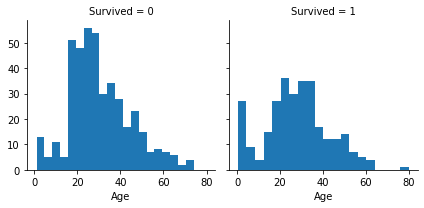

In [294]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Observations.

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 15-25 year olds did not survive.

Most passengers are in 15-35 age range.

Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

We should consider Age (our assumption classifying #2) in our model training.

Complete the Age feature for null values (completing #1).

We should band age groups (creating #3).

#### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


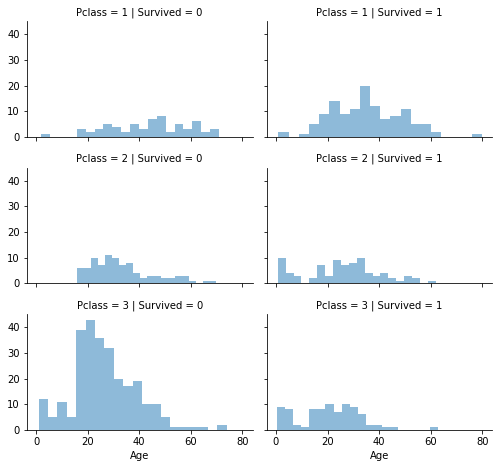

In [295]:
grid = sns.FacetGrid(train_df, col='Survived', row = 'Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.

Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.

Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.

Pclass varies in terms of Age distribution of passengers.

Decisions:
Consider Pclass for model training.


#### Correlating categorical features
Now we can correlate categorical features with our solution goal.

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


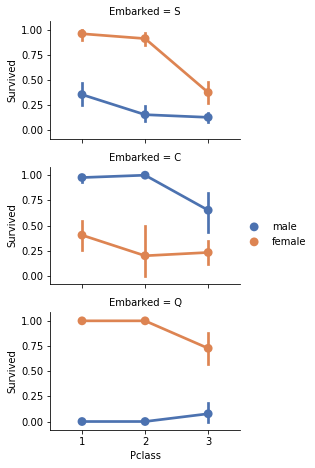

In [296]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Observations.

Female passengers had much better survival rate than males. Confirms classifying (#1).

Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).

Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Decisions:
Add Sex feature to model training. 
Complete and add Embarked feature to model training.

#### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


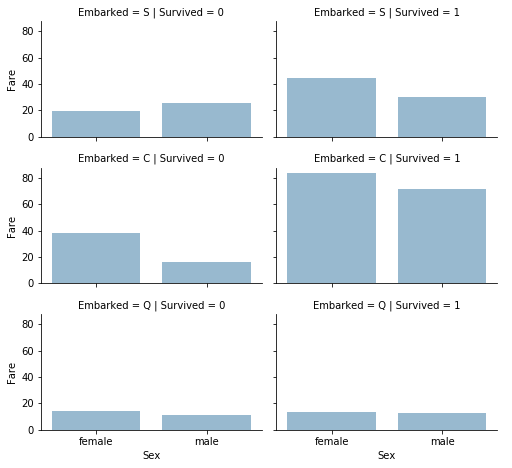

In [297]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Observations.

Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.

Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

Decisions.

Consider banding Fare feature.

## Features engineering

We have collected several assumptions and decisions regarding our datasets and solution requirements.Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

#### Correcting by dropping features

Based on our assumptions and decisions we want to drop the Cabin and Ticket features.

In [298]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [299]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [300]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


#### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [301]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [302]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.

In [303]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [304]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.



In [305]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [306]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [307]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [308]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [309]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


#### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. 

In [310]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### Completing a numerical continuous feature

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.



In [311]:
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age 

In [312]:
for i in range (0, 2):
    for j in range (0, 3):
        guess_df = train_df[(train_df['Sex']==i) & (train_df['Pclass']==j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        ## Convert random age float to nearest .5 age
        guess_age[i, j]= int(age_guess/0.5 + 0.5) * 0.5

for dataset in combine:
    for i in range (0, 2):
        for j in range (0, 3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1), 'Age'] = guess_age[i, j]
    dataset['Age'] = dataset['Age'].astype(int)

Let us create Age bands and determine correlations with Survived.

In [313]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [314]:
for dataset in combine:
    dataset.loc[dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age'] >16)&(dataset['Age'] <=32), 'Age']=1
    dataset.loc[(dataset['Age'] >32)&(dataset['Age'] <=48), 'Age']=2
    dataset.loc[(dataset['Age'] >48)&(dataset['Age'] <=64), 'Age']=3
    dataset.loc[dataset['Age'] >64, 'Age']=4

In [315]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [316]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [317]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [318]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [319]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [320]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [321]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [322]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Converting categorical feature to numeric¶
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [323]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### Quick completing and converting a numeric feature
We can now complete the Fare feature for single missing value in test dataset 

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. 

In [324]:
Train_Fare_mean = train_df['Fare'].median()
Train_Fare_mean

14.4542

In [325]:
test_df['Fare'].fillna(Train_Fare_mean, inplace=True)

In [326]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

We can now create FareBand.

In [327]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [328]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## Model, predict and solve

In [329]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [330]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [331]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [332]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [333]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [334]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


### k-Neighbors Classification

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closet data points in the training dataset (its "nearest neighbors").

We begin by splitting the training dataset into a new_training and new_test set. Then we evaluate training and test set performance on those with different numbers of neighbors.

In [335]:
from sklearn.neighbors import KNeighborsClassifier

In [336]:
from sklearn.model_selection import train_test_split
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

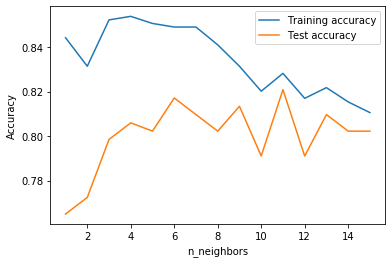

In [337]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 16
neighbors_settings = range (1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(new_X_train, new_y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(new_X_train, new_y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(new_X_test, new_y_test))
        
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

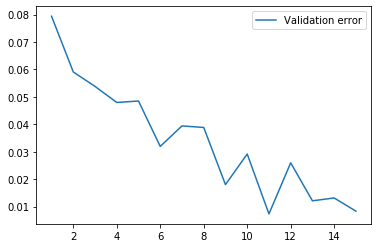

In [338]:
plt.plot(neighbors_settings, np.array(training_accuracy) - np.array(test_accuracy), label='Validation error')
plt.legend()

In [339]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
param_grid = {'n_neighbors' : np.arange(1,16)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=ShuffleSplit(test_size=0.20, n_splits=1, random_state=0))
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 3}

In [340]:
param_grid = {'n_neighbors' : np.arange(1,16)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=4)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [341]:
knn_cv.best_score_

0.8035914702581369

In [342]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(new_X_train, new_y_train)
knn.score(new_X_test, new_y_test)

0.8171641791044776

In [343]:
knn = KNeighborsClassifier(n_neighbors = 9 )
knn.fit(new_X_train, new_y_train)
knn.score(new_X_train, new_y_train)

0.8314606741573034

In [344]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(new_X_train, new_y_train)
knn.score(new_X_train, new_y_train)

0.8282504012841091

In [345]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(new_X_train, new_y_train)
y_pred = knn.predict(new_X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       157
           1       0.78      0.77      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268



In [346]:
from sklearn.metrics import precision_recall_curve

In [347]:
y_pred_proba = knn.predict_proba(new_X_test)
precision, recall, thresholds = precision_recall_curve(new_y_test, y_pred_proba[:,1])

In [348]:
thresholds

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [349]:
recall

array([1.        , 0.99099099, 0.94594595, 0.87387387, 0.81081081,
       0.76576577, 0.58558559, 0.54054054, 0.52252252, 0.33333333,
       0.        ])

In [350]:
0.8282504012841091

0.8282504012841091

In [351]:
precision

array([0.4141791 , 0.45454545, 0.60344828, 0.71851852, 0.77586207,
       0.77981651, 0.84415584, 0.88235294, 0.89230769, 0.88095238,
       1.        ])

In [352]:
thresholds[1:].shape

(9,)

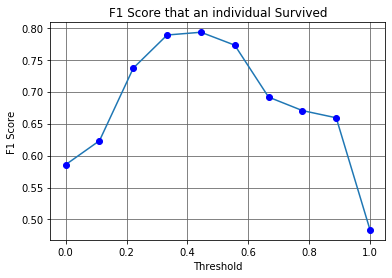

In [353]:
F1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots()



ax.plot(thresholds,F1[:-1])
ax.plot(thresholds, F1[:-1], 'bo')
plt.title("F1 Score that an individual Survived")
ax.set_ylabel("F1 Score")
ax.set_xlabel("Threshold")
ax.grid(b=True, which='major', color='#666666', linestyle='-')



To do: check Threshould behavior

Text(0.5, 1.0, 'F1 Score that an individual Survived')

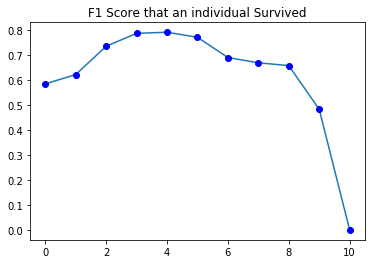

In [354]:
F1 = 2 * (precision * recall) / (precision + recall)
plt.plot(F1)
plt.plot(F1, 'bo')
plt.title("F1 Score that an individual Survived")

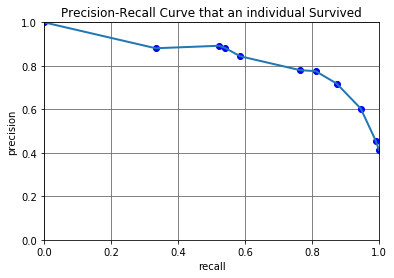

In [355]:
plt.plot(recall, precision, 'bo',lw=2)
plt.plot(recall, precision, lw=2)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve that an individual Survived")

plt.grid(b=True, which='major', color='#666666', linestyle='-')

NB: Threshold 1 corresponds to the point with Recall = 0 and Precision = 1

### Linear Models for Classification

Linear models make a prediction using a linear function of the input features. For binary classification, the prediction is made using the following formula:

y = w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b>0

Here, x[0] to x[p] denotes the features of a single data point, w and b are parameters of the model that are learned, and y is the prediction the model makes.

The formula looks very similar to the one for liner regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at 0. If the function is smaller than 0, we predict the class -1; if it is larger than 0, we predict the class +1.

The two most common linear classification algorithms are Logistic Regression and Linear Support Vector Machines (linear SVMs).

#### Logistic Regression

In [356]:
logreg = LogisticRegression( solver = "lbfgs").fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(logreg.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(logreg.score(new_X_test, new_y_test )))

Training set score:  0.814
Test set score:  0.806


In [357]:
svm = LinearSVC().fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(svm.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(svm.score(new_X_test, new_y_test )))

Training set score:  0.807
Test set score:  0.787


C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [358]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log  = LogisticRegression(solver = "lbfgs")
log_cv = GridSearchCV(log, param_grid, cv=4)
log_cv.fit(X_train, y_train)
log_cv.best_params_

{'C': 100}

In [359]:
logreg = LogisticRegression(C=0.1, solver = "lbfgs").fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(logreg.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(logreg.score(new_X_test, new_y_test )))

Training set score:  0.814
Test set score:  0.795


In [360]:
logreg1 = LogisticRegression(C=1, solver = "lbfgs").fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(logreg1.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(logreg1.score(new_X_test, new_y_test )))

Training set score:  0.814
Test set score:  0.806


In [361]:
logreg10 = LogisticRegression(C=100, solver = "lbfgs").fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(logreg10.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(logreg10.score(new_X_test, new_y_test )))

Training set score:  0.812
Test set score:  0.799


In [362]:
logreg = LogisticRegression(C=0.1, solver = "lbfgs")
logreg.fit(new_X_train, new_y_train)
y_pred = logreg.predict(new_X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [363]:
y_pred_proba = logreg.predict_proba(new_X_test)
precision, recall, thresholds = precision_recall_curve(new_y_test, y_pred_proba[:,1])

In [364]:
precision

array([0.42366412, 0.42471042, 0.43137255, 0.43307087, 0.43478261,
       0.43253968, 0.43426295, 0.436     , 0.45851528, 0.46666667,
       0.53061224, 0.53333333, 0.53608247, 0.5388601 , 0.54166667,
       0.55026455, 0.56284153, 0.56906077, 0.58522727, 0.58857143,
       0.59195402, 0.61676647, 0.62048193, 0.62424242, 0.62804878,
       0.63190184, 0.64968153, 0.65384615, 0.65806452, 0.66233766,
       0.66013072, 0.66447368, 0.66887417, 0.67785235, 0.68243243,
       0.68055556, 0.69503546, 0.7080292 , 0.70769231, 0.7109375 ,
       0.71653543, 0.712     , 0.71774194, 0.72357724, 0.72131148,
       0.71900826, 0.72033898, 0.73275862, 0.74336283, 0.75      ,
       0.75700935, 0.75471698, 0.76190476, 0.78217822, 0.79381443,
       0.79166667, 0.8       , 0.80851064, 0.80645161, 0.80434783,
       0.8021978 , 0.82954545, 0.8372093 , 0.83529412, 0.8452381 ,
       0.85542169, 0.86419753, 0.86486486, 0.8630137 , 0.86111111,
       0.85714286, 0.85507246, 0.86567164, 0.875     , 0.87301

In [365]:
recall

array([1.        , 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.98198198, 0.98198198, 0.98198198, 0.94594595, 0.94594595,
       0.93693694, 0.93693694, 0.93693694, 0.93693694, 0.93693694,
       0.93693694, 0.92792793, 0.92792793, 0.92792793, 0.92792793,
       0.92792793, 0.92792793, 0.92792793, 0.92792793, 0.92792793,
       0.92792793, 0.91891892, 0.91891892, 0.91891892, 0.91891892,
       0.90990991, 0.90990991, 0.90990991, 0.90990991, 0.90990991,
       0.88288288, 0.88288288, 0.87387387, 0.82882883, 0.81981982,
       0.81981982, 0.8018018 , 0.8018018 , 0.8018018 , 0.79279279,
       0.78378378, 0.76576577, 0.76576577, 0.75675676, 0.75675676,
       0.72972973, 0.72072072, 0.72072072, 0.71171171, 0.69369369,
       0.68468468, 0.68468468, 0.68468468, 0.67567568, 0.66666667,
       0.65765766, 0.65765766, 0.64864865, 0.63963964, 0.63963964,
       0.63963964, 0.63063063, 0.57657658, 0.56756757, 0.55855856,
       0.54054054, 0.53153153, 0.52252252, 0.5045045 , 0.49549

In [366]:
thresholds

array([0.06302506, 0.0673577 , 0.07991224, 0.08700346, 0.09854993,
       0.09893704, 0.10505091, 0.11192748, 0.11236059, 0.11919424,
       0.12654363, 0.13410955, 0.14258522, 0.14311784, 0.14965858,
       0.15150284, 0.16079982, 0.16806658, 0.17062991, 0.17993889,
       0.19067317, 0.19999478, 0.21045718, 0.21089195, 0.22372523,
       0.23553472, 0.24858024, 0.26153857, 0.26830652, 0.28227631,
       0.29652507, 0.29773119, 0.3106396 , 0.31281197, 0.32989303,
       0.34351377, 0.34481733, 0.36105692, 0.37418954, 0.37524384,
       0.37814545, 0.39098694, 0.39447485, 0.39515997, 0.41227857,
       0.42713269, 0.42717375, 0.44640107, 0.45860864, 0.46120254,
       0.46228365, 0.46295476, 0.46338422, 0.47891678, 0.48067626,
       0.52779011, 0.54605814, 0.55835597, 0.56099178, 0.56489416,
       0.56547455, 0.57842413, 0.58286125, 0.59203434, 0.60958456,
       0.61348299, 0.61539743, 0.61595625, 0.63211716, 0.64231976,
       0.64576895, 0.64834004, 0.65848865, 0.66172376, 0.66186

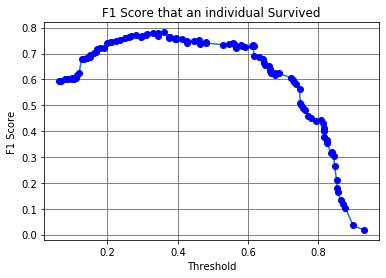

In [367]:
F1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots()



ax.plot(thresholds,F1[:-1])
ax.plot(thresholds, F1[:-1], 'bo')
plt.title("F1 Score that an individual Survived")
ax.set_ylabel("F1 Score")
ax.set_xlabel("Threshold")
ax.grid(b=True, which='major', color='#666666', linestyle='-')


Text(0.5, 1.0, 'F1 Score that an individual Survived')

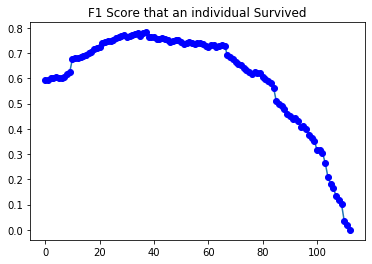

In [368]:
F1 = 2 * (precision * recall) / (precision + recall)
plt.plot(F1)
plt.plot(F1, 'bo')
plt.title("F1 Score that an individual Survived")

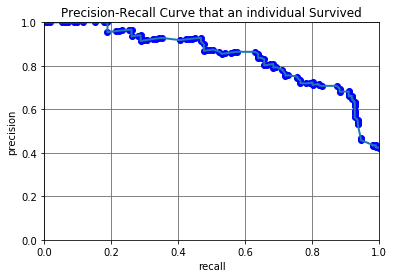

In [369]:
plt.plot(recall, precision, 'bo',lw=2)
plt.plot(recall, precision, lw=2)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve that an individual Survived")

plt.grid(b=True, which='major', color='#666666', linestyle='-')

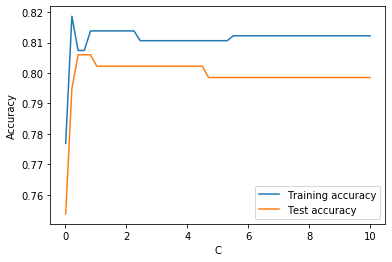

In [370]:
training_accuracy = []
test_accuracy = []
# try different values of C
logreg_settings = np.linspace(0.01, 10)

for C in logreg_settings:
    # build the model
    log = LogisticRegression(C=C, solver = "lbfgs")
    log.fit(new_X_train, new_y_train)
    # record training set accuracy
    training_accuracy.append(log.score(new_X_train, new_y_train))
    # record generalization accuracy
    test_accuracy.append(log.score(new_X_test, new_y_test))
        
plt.plot(logreg_settings, training_accuracy, label='Training accuracy')
plt.plot(logreg_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()

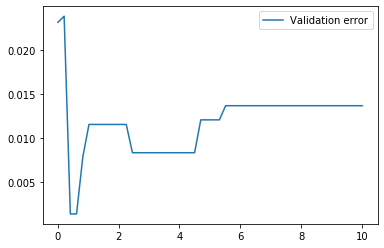

In [371]:
plt.plot(logreg_settings, np.array(training_accuracy) - np.array(test_accuracy), label='Validation error')
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limitsthe model to using only a few features.

In [372]:
for C, marker in zip([0.1, 1, 10], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(new_X_train, new_y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(new_X_train, new_y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(new_X_test, new_y_test)))


Training accuracy of l1 logreg with C=0.100: 0.80
Test accuracy of l1 logreg with C=0.100: 0.80
Training accuracy of l1 logreg with C=1.000: 0.82
Test accuracy of l1 logreg with C=1.000: 0.80
Training accuracy of l1 logreg with C=10.000: 0.81
Test accuracy of l1 logreg with C=10.000: 0.80


C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Linear Support Vector Machines

In [373]:
svm = LinearSVC(max_iter=3000).fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(svm.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(svm.score(new_X_test, new_y_test )))


Training set score:  0.807
Test set score:  0.787


In [374]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
svm = LinearSVC(max_iter=3000)
svm_cv = GridSearchCV(svm, param_grid, cv=4)
svm_cv.fit(X_train, y_train)
svm_cv.best_params_

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the num

{'C': 10}

In [375]:
svm = LinearSVC(C=0.01).fit(new_X_train, new_y_train)
print("Training set score: {: .3f}".format(svm.score(new_X_train, new_y_train)))
print("Test set score: {: .3f}".format(svm.score(new_X_test, new_y_test )))

Training set score:  0.815
Test set score:  0.791


In [376]:
svm = LinearSVC(C=0.01)
svm.fit(new_X_train, new_y_train)
y_pred = svm.predict(new_X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else  questions, leading to a decision.

In [377]:
from sklearn.tree import DecisionTreeClassifier

In [378]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(new_X_train, new_y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(new_X_train, new_y_train)))
print("Accuracy on test set: {:3f}".format(tree.score(new_X_test, new_y_test)))

Accuracy on training set: 0.833
Accuracy on test set: 0.798507


To summarize the workings of the tree we can use feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means " perfectly predicts the target"

In [379]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.21003931 0.01618018 0.         0.06089513 0.02519674 0.67090709
 0.01038728 0.00639428]


However, if a feature has a low value in feature_importance_, it doesn't mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

In [380]:
new_X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Class'],
      dtype='object')

In [381]:
param_grid = {'max_depth': [4, 8, 10] }
decision_trees = DecisionTreeClassifier()
decision_trees_cv = GridSearchCV(decision_trees, param_grid, cv=4)
decision_trees_cv.fit(X_train, y_train)
decision_trees_cv.best_params_

{'max_depth': 4}

In [382]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(new_X_train, new_y_train)
y_pred = tree.predict(new_X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



In [383]:
y_pred_proba = tree.predict_proba(new_X_test)
precision, recall, thresholds = precision_recall_curve(new_y_test, y_pred_proba[:,1])

In [384]:
precision

array([0.4141791 , 0.42471042, 0.43426295, 0.64556962, 0.65540541,
       0.66896552, 0.69117647, 0.70992366, 0.73170732, 0.75      ,
       0.81318681, 0.86904762, 0.92063492, 0.82758621, 1.        ,
       1.        ])

In [385]:
recall

array([1.        , 0.99099099, 0.98198198, 0.91891892, 0.87387387,
       0.87387387, 0.84684685, 0.83783784, 0.81081081, 0.75675676,
       0.66666667, 0.65765766, 0.52252252, 0.21621622, 0.00900901,
       0.        ])

In [386]:
thresholds

array([0.        , 0.08823529, 0.12669683, 0.14285714, 0.15384615,
       0.18181818, 0.23529412, 0.27272727, 0.38095238, 0.44262295,
       0.63636364, 0.65116279, 0.95      , 0.98245614, 1.        ])

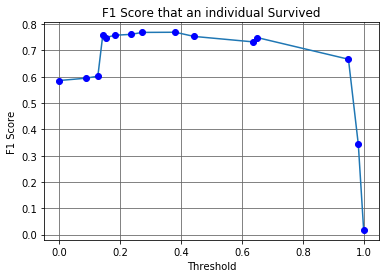

In [387]:
F1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots()



ax.plot(thresholds,F1[:-1])
ax.plot(thresholds, F1[:-1], 'bo')
plt.title("F1 Score that an individual Survived")
ax.set_ylabel("F1 Score")
ax.set_xlabel("Threshold")
ax.grid(b=True, which='major', color='#666666', linestyle='-')


Text(0.5, 1.0, 'F1 Score that an individual Survived')

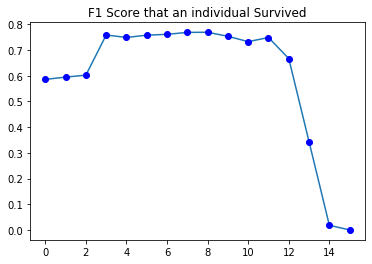

In [388]:
F1 = 2 * (precision * recall) / (precision + recall)
plt.plot(F1)
plt.plot(F1, 'bo')
plt.title("F1 Score that an individual Survived")

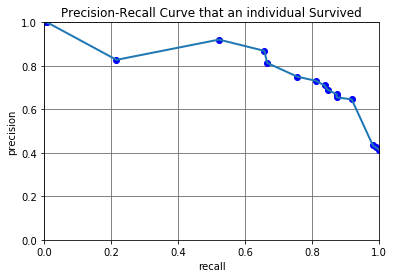

In [389]:
plt.plot(recall, precision, 'bo',lw=2)
plt.plot(recall, precision, lw=2)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve that an individual Survived")

plt.grid(b=True, which='major', color='#666666', linestyle='-')

### Ensembles of Decision Trees

Ensembles are methods that combine multiple machine learning models to create more powerful models.

#### Random forests

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind the model is that each tree might do a relatively  good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. 

In [390]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(new_X_train, new_y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(new_X_train, new_y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(new_X_test, new_y_test)))

Accuracy on training set: 0.867
Accuracy on test set: 0.780


In [391]:
from sklearn.ensemble import RandomForestClassifier

from timeit import default_timer as timer

start = timer()

n_estimator_to_use = 1000

forest = RandomForestClassifier(n_estimators=n_estimator_to_use, random_state=2)
forest.fit(new_X_train, new_y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(new_X_train, new_y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(new_X_test, new_y_test)))

end = timer()
print('Time spent for n estimators ' + str(n_estimator_to_use))
print(end - start)

Accuracy on training set: 0.880
Accuracy on test set: 0.787
Time spent for n estimators 1000
3.1264841540000816


In [411]:
from sklearn.ensemble import RandomForestClassifier

from timeit import default_timer as timer

start = timer()

n_estimator_to_use = 100

forest = RandomForestClassifier(n_estimators=n_estimator_to_use, random_state=2)
forest.fit(new_X_train, new_y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(new_X_train, new_y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(new_X_test, new_y_test)))

end = timer()
print('Time spent for n estimators ' + str(n_estimator_to_use))
print(end - start)

Accuracy on training set: 0.880
Accuracy on test set: 0.795
Time spent for n estimators 100
0.3827205670004332


In [412]:
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.12727463 0.21754917 0.05393639 0.13959867 0.09635212 0.23432174
 0.04063159 0.0903357 ]


In [415]:
new_X_train.head(2)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
445,1,0,0,3,0,4,0,0
650,3,0,1,0,0,1,1,3


In [393]:
estimated_time = 0
time_per_estimator = 3/1000

for n_estimator_to_use in range(10,1000, 50):
    estimated_time = estimated_time + time_per_estimator*n_estimator_to_use
    
print(estimated_time/60)

0.48500000000000004


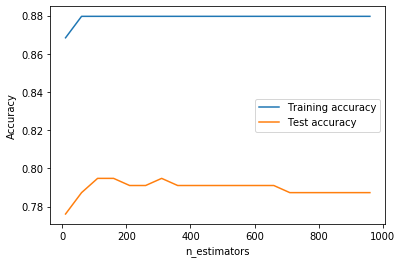

In [394]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 10 to 1000, in steps of 50
estimators_settings = range (10, 1000, 50)

for n_estimators in estimators_settings:
    # build the model
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=2)
    forest.fit(new_X_train, new_y_train)
    training_accuracy.append(forest.score(new_X_train, new_y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(new_X_test, new_y_test))
        
plt.plot(estimators_settings, training_accuracy, label='Training accuracy')
plt.plot(estimators_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend()

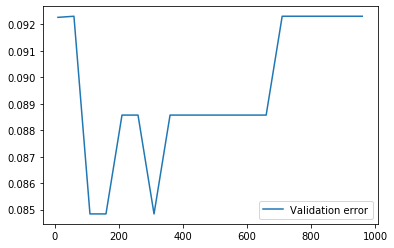

In [395]:
plt.plot(estimators_settings, np.array(training_accuracy) - np.array(test_accuracy), label='Validation error')
plt.legend()

In [396]:
param_grid = {'n_estimators': [10, 100, 150, 200, 250] }
forest = RandomForestClassifier()
forest_cv = GridSearchCV(forest, param_grid, cv=4)
forest_cv.fit(X_train, y_train)
forest_cv.best_params_

{'n_estimators': 150}

In [397]:
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(new_X_train, new_y_train)
y_pred = forest.predict(new_X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       157
           1       0.75      0.76      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.79       268



In [405]:
y_pred_proba = tree.predict_proba(new_X_test)
precision, recall, thresholds = precision_recall_curve(new_y_test, y_pred_proba[:,1])

In [406]:
precision


array([0.4141791 , 0.42471042, 0.43426295, 0.64556962, 0.65540541,
       0.66896552, 0.69117647, 0.70992366, 0.73170732, 0.75      ,
       0.81318681, 0.86904762, 0.92063492, 0.82758621, 1.        ,
       1.        ])

In [407]:
recall

array([1.        , 0.99099099, 0.98198198, 0.91891892, 0.87387387,
       0.87387387, 0.84684685, 0.83783784, 0.81081081, 0.75675676,
       0.66666667, 0.65765766, 0.52252252, 0.21621622, 0.00900901,
       0.        ])

In [408]:
thresholds

array([0.        , 0.08823529, 0.12669683, 0.14285714, 0.15384615,
       0.18181818, 0.23529412, 0.27272727, 0.38095238, 0.44262295,
       0.63636364, 0.65116279, 0.95      , 0.98245614, 1.        ])

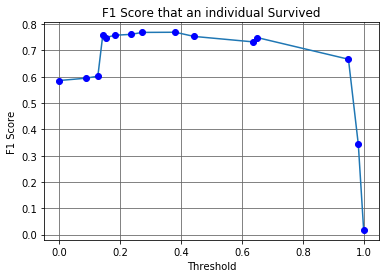

In [409]:
F1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots()



ax.plot(thresholds,F1[:-1])
ax.plot(thresholds, F1[:-1], 'bo')
plt.title("F1 Score that an individual Survived")
ax.set_ylabel("F1 Score")
ax.set_xlabel("Threshold")
ax.grid(b=True, which='major', color='#666666', linestyle='-')


Text(0.5, 1.0, 'F1 Score that an individual Survived')

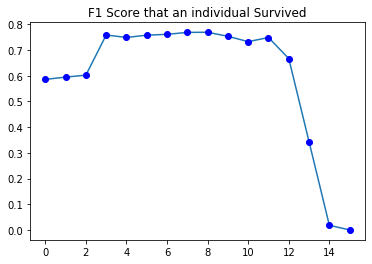

In [410]:
F1 = 2 * (precision * recall) / (precision + recall)
plt.plot(F1)
plt.plot(F1, 'bo')
plt.title("F1 Score that an individual Survived")

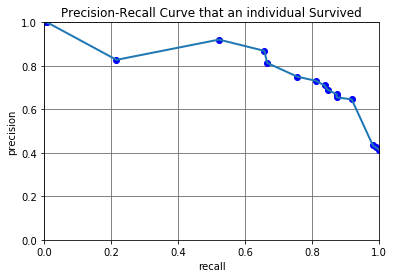

In [404]:
plt.plot(recall, precision, 'bo',lw=2)
plt.plot(recall, precision, lw=2)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve that an individual Survived")

plt.grid(b=True, which='major', color='#666666', linestyle='-')